## <p style='text-align: center;'> Analyse des emotions des Tweets 😀 😞 😡 </p> 

### <span style="color: Navy"> 2.Importation des bibliotheques </span> 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from wordcloud import WordCloud
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, precision_score, f1_score


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import ComplementNB
from sklearn.metrics import accuracy_score
import re
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords

### <span style="color: Navy"> 3.Nettoyage des données : </span> 

In [4]:
df=pd.read_csv('datasets/text.csv')
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416809 entries, 0 to 416808
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    416809 non-null  object
 1   label   416809 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 6.4+ MB


In [7]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [8]:
df.duplicated().sum()

686

In [9]:
df.drop_duplicates(inplace=True)
df.shape

(416123, 2)

In [10]:
Emotion ={0:'Sadness',1:'joy',2:'love',3:'anger',4:'fear',5:'surprise'}
df['Emotion'] = df['label'].map(Emotion)
df.head()


,text,label,Emotion
0,i just feel really helpless and heavy hearted,4,fear
1,ive enjoyed being able to slouch about relax a...,0,Sadness
2,i gave up my internship with the dmrg and am f...,4,fear
3,i dont know i feel so lost,0,Sadness
4,i am a kindergarten teacher and i am thoroughl...,4,fear


In [11]:
# Text preprocessing avec NLTK
import nltk
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <span style="color: Navy"> 4.Normalisation des données</span>

In [12]:
# Prétraitement des données
#def preprocess_text(text):
    # Supprimer les balises HTML
    #soup = BeautifulSoup(text, "html.parser")
    #text = soup.get_text()
    # Supprimer les caractères spéciaux
    #text = re.sub(r"[^a-zA-Z0-9]", " ", text)
    # Convertir en minuscules
    #text = text.lower()
    #return text

In [13]:
# Appliquer le prétraitement sur les données
#df['text'] = df['text'].apply(preprocess_text)

In [14]:
# Définir les émotions à prédire
#emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [15]:
# Créer un dictionnaire de négation
#negation_words = ['not', 'no', 'never']
#negation_dict = {word: f"not_{word}" for word in negation_words}

# Fonction pour gérer le contexte de négation
#def handle_negation(text):
#    words = text.split()
#    negated = False
#    negated_text = []
#    for word in words:
#        if word in negation_words:
#            negated = True
#        elif negated and word not in stopwords.words('english'):
#            word = negation_dict.get(word, word)
#            negated_text.append(word)
#        else:
#            negated_text.append(word)
#    return ' '.join(negated_text)

# Appliquer la gestion de la négation sur les données
#df['negated_text'] = df['text'].apply(handle_negation)

In [16]:
def preprocess(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha()] # ne garder que les mots alphabétiques
    tokens = [word.lower() for word in tokens] # mettre en minuscule
    tokens = [word for word in tokens if not word in stop_words] # suppression des mots vides
    return ' '.join(tokens)

In [17]:
df['text'] = df['text'].apply(preprocess)

In [18]:
df.head()

,text,label,Emotion
0,feel really helpless heavy hearted,4,fear
1,ive enjoyed able slouch relax unwind frankly n...,0,Sadness
2,gave internship dmrg feeling distraught,4,fear
3,dont know feel lost,0,Sadness
4,kindergarten teacher thoroughly weary job take...,4,fear


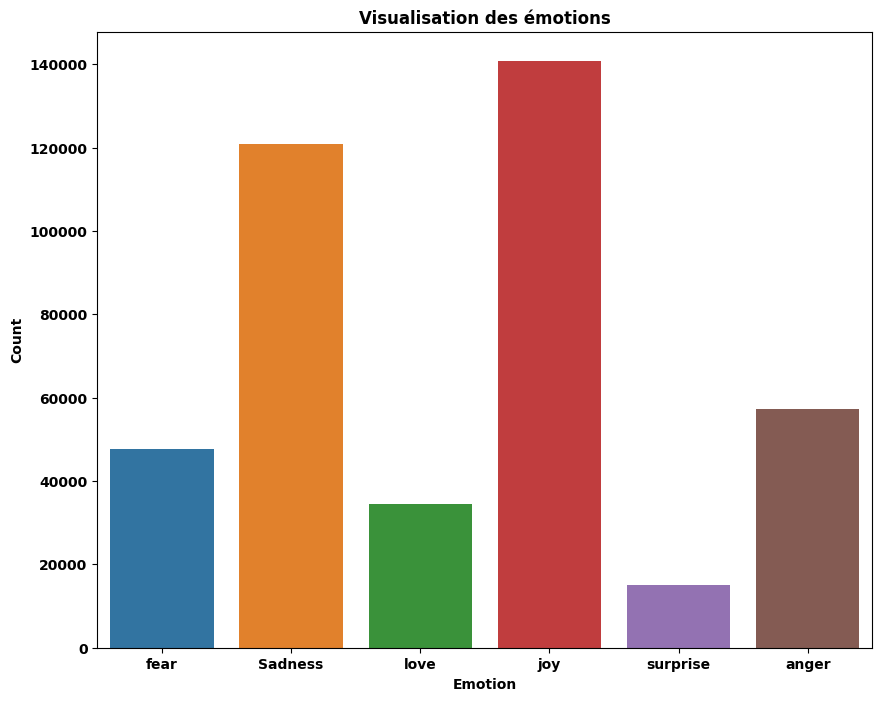

In [31]:
# Création du graphique
plt.figure(figsize=(10, 8))
sns.countplot(x='Emotion', data=df, hue='Emotion')

# Ajout du titre en gras
plt.title('Visualisation des émotions', fontweight='bold')

# Ajout des étiquettes en gras
plt.xlabel('Emotion', fontweight='bold')
plt.ylabel('Count', fontweight='bold')

# Rendre les étiquettes des axes x et y en gras
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')

# Affichage du graphique
plt.show()

### <span style="color: Navy"> 6.Séparation des données: </span> 

In [20]:
# Séparation des variables indépendantes et de la variable cible
X = df['text']
Y = df['label']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=42)

In [22]:
# Créer un vectoriseur avec CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2)) 

# Créer un vectoriseur avec TfidfVectorizer
#vectorizer = TfidfVectorizer()
# Appliquer le vectoriseur sur les données d'entraînement et de test
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [23]:
# Créer un pipeline avec TfidfVectorizer et ComplementNB
# Entraîner un modèle de ComplementNB
model = ComplementNB()
model.fit(X_train_vec, y_train)

ComplementNB()

In [24]:
# Prédiction sur l'ensemble de test
y_pred = model.predict(X_test_vec)

# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8886692700510664


In [25]:
# Évaluation du modèle
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("recall:", recall)

Accuracy: 0.8886692700510664
Precision: 0.8873115767470895
F1 Score: 0.8877744246806257
recall: 0.8886692700510664


In [26]:
    # Définir une fonction pour prédire l'émotion tout en prenant en compte la négation
#def predict_emotion_with_negation(text):
    # Prétraiter et gérer la négation sur le texte
 #   preprocessed_text = preprocess_text(text)
 #   negated_text = handle_negation(preprocessed_text)

    # Vectoriser le texte
   # text_vec = vectorizer.transform([negated_text])

    # Prédire l'émotion
    #predicted_emotion = model.predict(text_vec)

    # Obtenir le nom de la classe prédite
    #predicted_emotion_name = model.classes_[predicted_emotion[0]]

    #return predicted_emotion_name

# Texte à prédire
#text_to_predict = "I'm not happy today"

# Prédire l'émotion avec gestion de la négation
#predicted_emotion_with_negation = predict_emotion_with_negation(text_to_predict)

#print("Texte à prédire:", text_to_predict)
#print("Emotion prédite (nom de la classe):", predicted_emotion_with_negation)




### <span style="color: Navy"> 9.Évaluation du modèle :</span>


### <span style="color: Navy"> 10.Visualisation :</span>

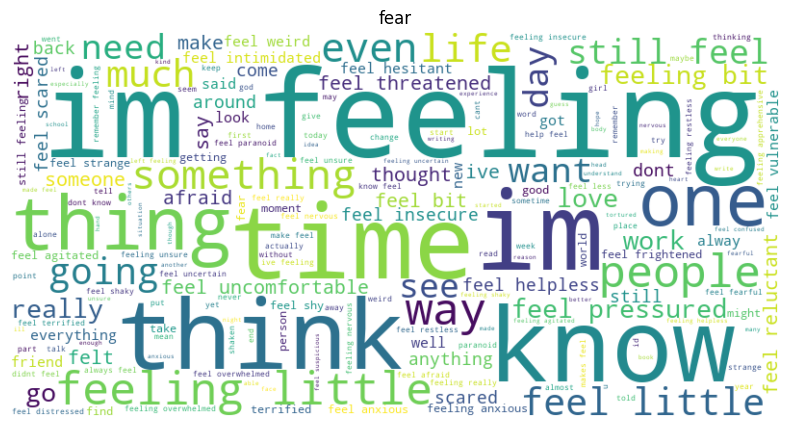

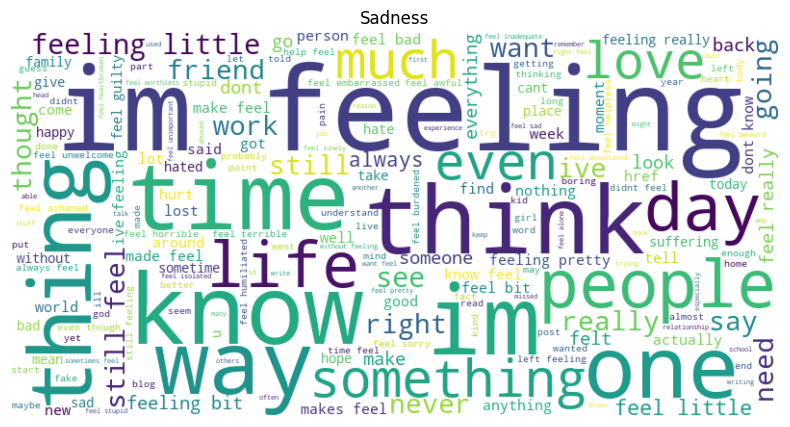

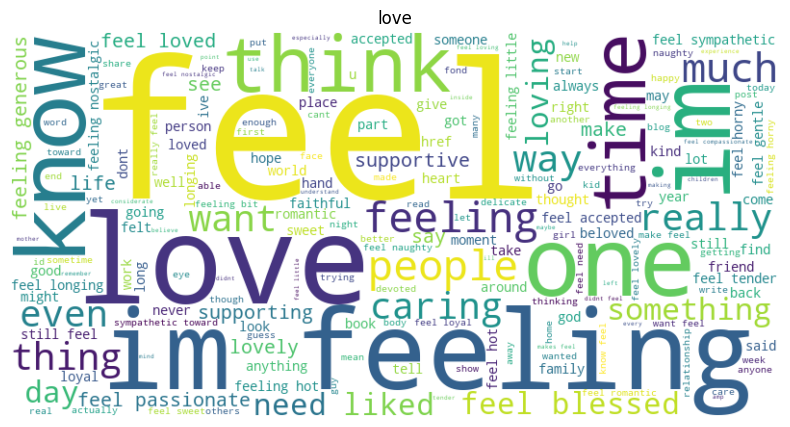

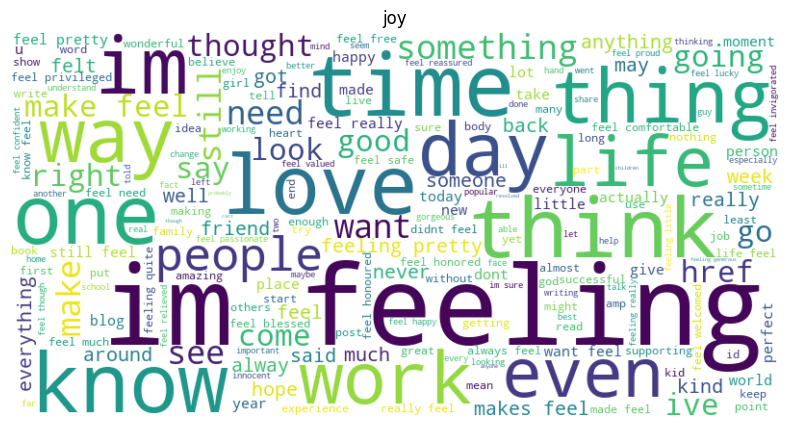

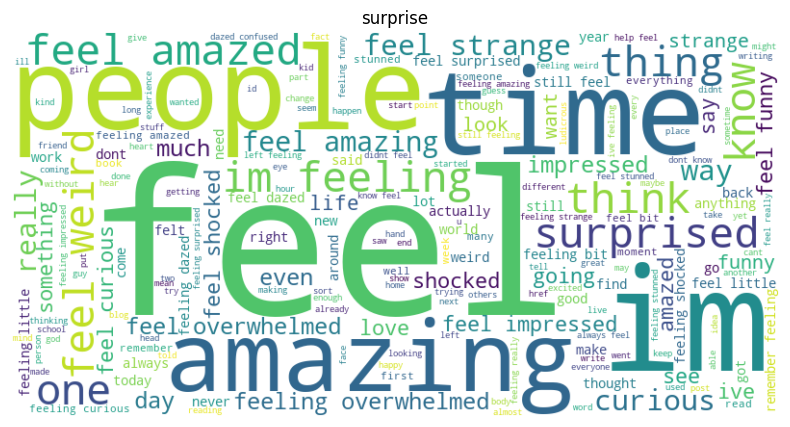

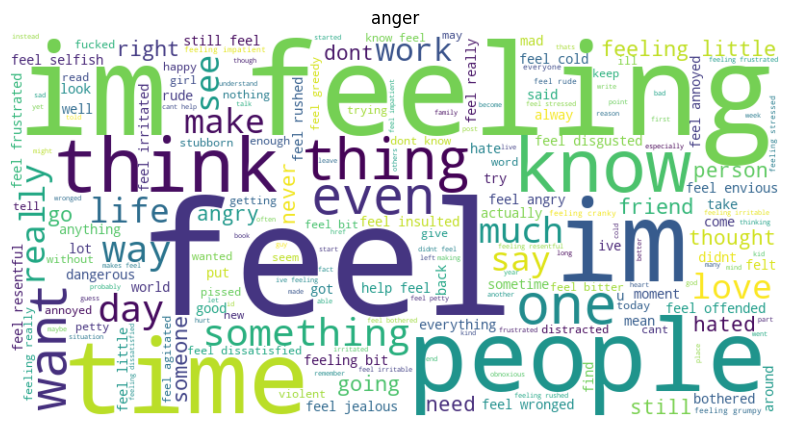

In [27]:

# Créer un dictionnaire pour stocker les textes associés à chaque émotion
emotion_texts = {}

# Filtrer les textes en fonction de l'émotion et les stocker dans le dictionnaire
for emotion in df['Emotion'].unique():
    emotion_texts[emotion] = " ".join(df[df['Emotion'] == emotion]['text'])

# Générer un nuage de mots pour chaque émotion
for emotion, text in emotion_texts.items():
    # Créer un objet WordCloud avec les paramètres appropriés
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Afficher le nuage de mots
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(emotion)
    plt.axis('off')
    plt.show()


In [28]:

# Calculer la matrice de confusion
#conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
#plt.figure(figsize=(10, 8))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label.classes_, yticklabels=label.classes_)
#plt.xlabel('Émotions Prédites')
#plt.ylabel('Émotions Réelles')
#plt.title('Matrice de Confusion')
#plt.show()


### <span style="color: Navy"> 11.Prediction des nouveaux textes:</span>

In [29]:
def predict_emotion(new_text, pipeline):
    # Prétraitement du nouveau texte
    preprocessed_text = preprocess(new_text)
    
    # Prédiction de l'émotion (label numérique)
    predicted_label = pipeline.predict([preprocessed_text])[0]
    
    # Récupération du nom de la classe associée à la prédiction
    predicted_class = Emotion[predicted_label]
    
    return predicted_label, predicted_class



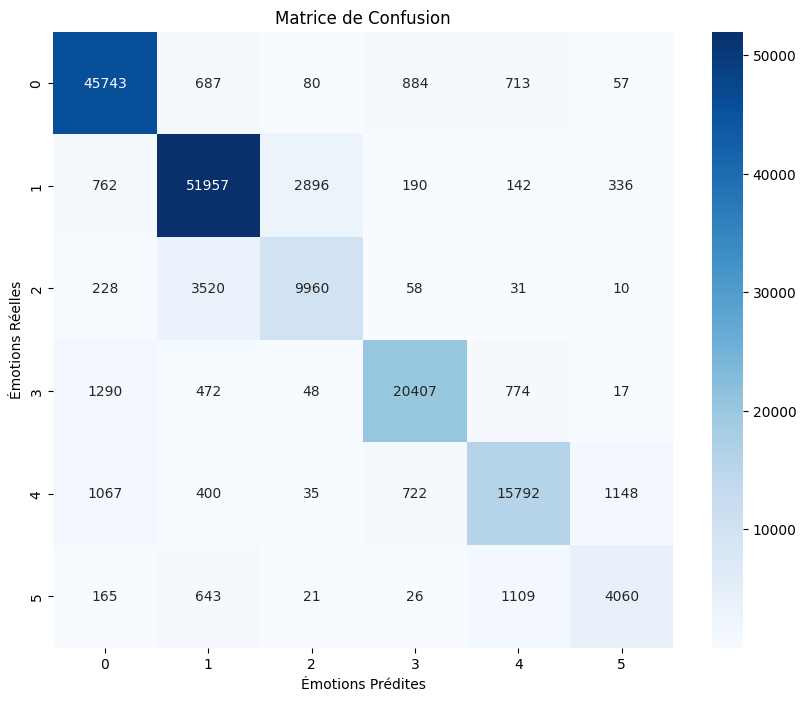

In [30]:
# Calculer la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)

# Afficher la matrice de confusion sous forme de heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Émotions Prédites')
plt.ylabel('Émotions Réelles')
plt.title('Matrice de Confusion')
plt.show()